In [ ]:
import kagglehub

# Herunterladen des Datensatzes
path = kagglehub.dataset_download("venky73/spam-mails-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spam-mails-dataset


In [ ]:
# Laden Sie das Dataset
import pandas as pd

# Nehmen wir an, die Datei ist eine CSV-Datei im heruntergeladenen Verzeichnis
# Passen Sie den Dateinamen an, falls er anders ist
dataset_file = path + '/spam_ham_dataset.csv'

# Lesen Sie die CSV-Datei in einen Pandas DataFrame
df = pd.read_csv(dataset_file)

# Zeigen Sie die ersten Zeilen des DataFrames an, um zu überprüfen, ob es korrekt geladen wurde.
print(df.head())

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


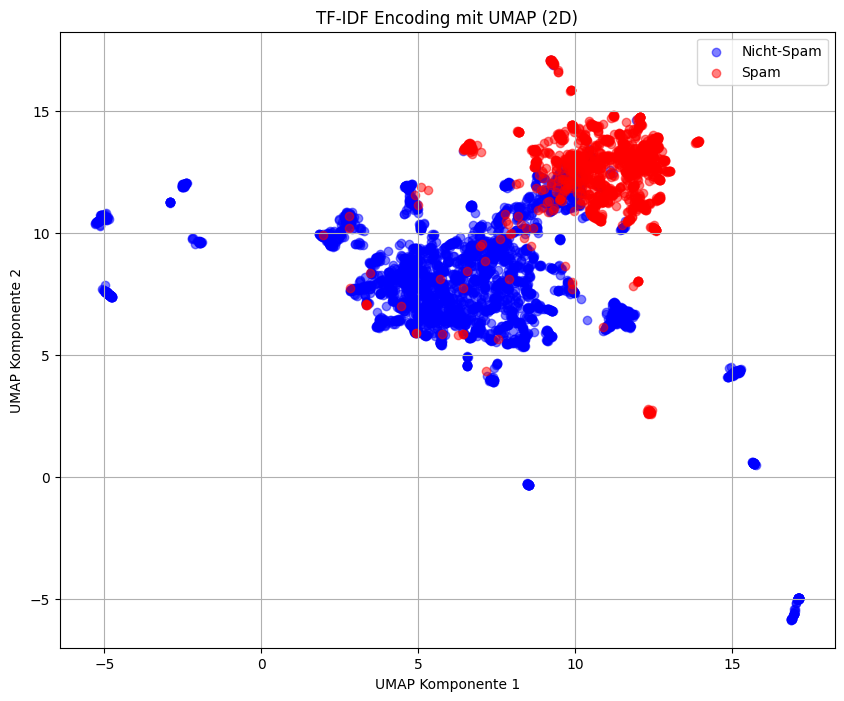

In [ ]:

import matplotlib.pyplot as plt
import umap
from sklearn.feature_extraction.text import TfidfVectorizer

# Erstellen eines TfidfVectorizer Modells
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
emails = df['text']
labels = df['label_num']
X_tfidf = tfidf_vectorizer.fit_transform(emails)

# Anwenden von UMAP zur Dimensionsreduktion auf 2 Komponenten auf die TF-IDF Matrix
reducer_tfidf = umap.UMAP(n_components=2)
X_tfidf_umap = reducer_tfidf.fit_transform(X_tfidf)

# Erstellen eines 3D Scatter-Plots für TF-IDF
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Plotten von Nicht-Spam-E-Mails in Blau
ax.scatter(X_tfidf_umap[labels == 0, 0], X_tfidf_umap[labels == 0, 1], c='blue', label='Nicht-Spam', alpha=0.5)

# Plotten von Spam-E-Mails in Rot
ax.scatter(X_tfidf_umap[labels == 1, 0], X_tfidf_umap[labels == 1, 1],  c='red', label='Spam', alpha=0.5)

# Hinzufügen von Titeln und Labels
ax.set_title('TF-IDF Encoding mit UMAP (2D)')
ax.set_xlabel('UMAP Komponente 1')
ax.set_ylabel('UMAP Komponente 2')
ax.legend()
plt.grid(True)
plt.show()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │     3,209,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,211,137 (12.25 MB)

 Trainable params: 3,211,137 (12.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
104/104 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.7124 - loss: 0.5962 - val_accuracy: 0.9771 - val_loss: 0.1796
Epoch 2/2
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9845 - loss: 0.1348 - val_accuracy: 0.9928 - val_loss: 0.0398
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9862 - loss: 0.0514
Test Loss: 0.0473
Test Accuracy: 0.9884
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Acc: 0.9884057971014493
Recall: 0.9863481228668942
Precision: 0.9730639730639731


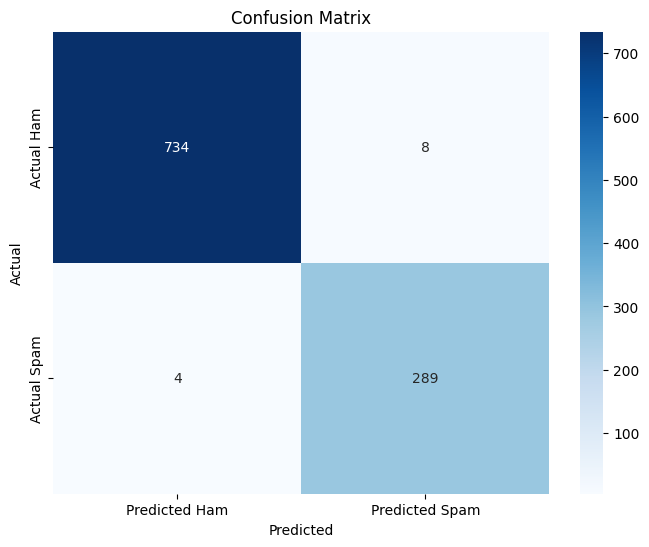

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import recall_score, precision_score

# TF-IDF Vectorizer erstellen (basierend auf dem vorherigen Code)
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(emails)
y = labels # Die Labels sind bereits vorbereitet

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Das neuronale Netzmodell erstellen
model = Sequential([
    Input((X_train.shape[1],)),
    # Erste Schicht: Eine Dense-Schicht mit 64 Einheiten und ReLU-Aktivierung
    Dense(64, activation='relu'),
    # Dropout-Schicht zur Regularisierung, um Overfitting zu reduzieren
    Dropout(0.5),
    # Zweite Schicht: Eine weitere Dense-Schicht mit 32 Einheiten und ReLU-Aktivierung
    Dense(32, activation='relu'),
    # Dropout-Schicht
    Dropout(0.5),
    # Ausgabeschicht: Eine Dense-Schicht mit 1 Einheit und Sigmoid-Aktivierung für binäre Klassifizierung
    Dense(1, activation='sigmoid')
])

# Das Modell kompilieren
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Binäre Kreuzentropie für binäre Klassifizierung
              metrics=['accuracy'])

# Modellübersicht anzeigen
model.summary()

# Das Modell trainieren
# epoch: Eine komplette Iteration über den gesamten Trainingsdatensatz
# batch_size: Anzahl der Samples pro Gradientenupdate
# validation_split: Prozentsatz der Trainingsdaten, der für die Validierung verwendet wird
history = model.fit(X_train, y_train,
                    epochs=2,
                    batch_size=32,
                    validation_split=0.2)

# Das Modell auf den Testdaten evaluieren
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Vorhersagen auf dem Testset machen
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32") # Schwellenwert 0.5 für binäre Klassifizierung

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Acc: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# Berechnen der Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Anzeigen der Confusion Matrix als Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

KNN Test Accuracy: 0.9633
KNN Recall: 0.8874
KNN Precision: 0.9811


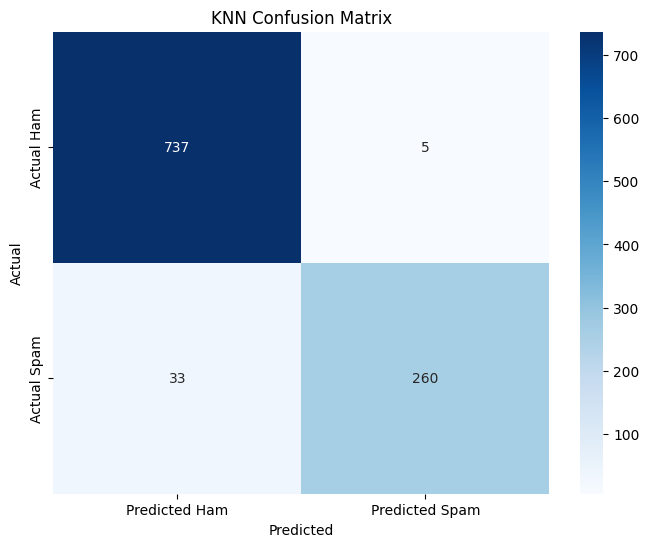

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# KNN Modell erstellen
knn = KNeighborsClassifier(n_neighbors=32) # Sie können die Anzahl der Nachbarn anpassen

# Modell trainieren
knn.fit(X_train, y_train)

# Vorhersagen auf dem Testset machen
y_pred_knn = knn.predict(X_test)

# Modell auf den Testdaten evaluieren
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)

print(f'KNN Test Accuracy: {accuracy_knn:.4f}')
print(f"KNN Recall: {recall_knn:.4f}")
print(f"KNN Precision: {precision_knn:.4f}")

# Berechnen der Confusion Matrix für KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Anzeigen der Confusion Matrix als Heatmap für KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree Test Accuracy: 0.9420
Decision Tree Recall: 0.9113
Decision Tree Precision: 0.8870


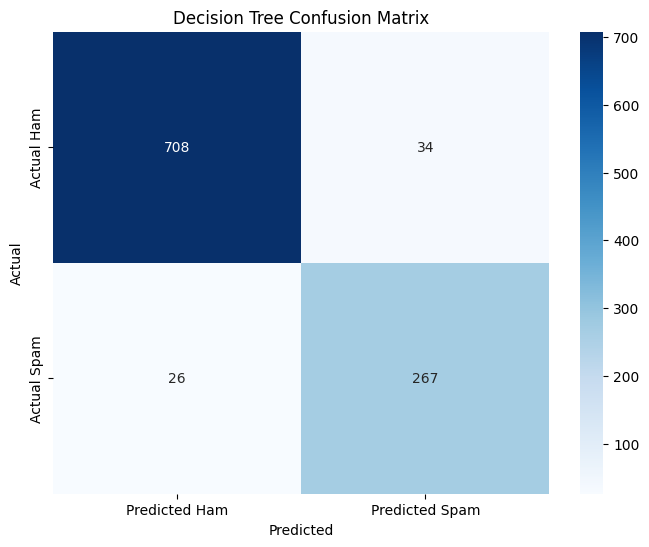

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Modell erstellen
dt_model = DecisionTreeClassifier(random_state=42) # random_state für Reproduzierbarkeit

# Modell trainieren
dt_model.fit(X_train, y_train)

# Vorhersagen auf dem Testset machen
y_pred_dt = dt_model.predict(X_test)

# Modell auf den Testdaten evaluieren
accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)

print(f'Decision Tree Test Accuracy: {accuracy_dt:.4f}')
print(f"Decision Tree Recall: {recall_dt:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")

# Berechnen der Confusion Matrix für Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Anzeigen der Confusion Matrix als Heatmap für Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()